In [25]:
# ---------------------------------------------
# EARLY HEART DISEASE PREDICTION USING ML
# ---------------------------------------------

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# 2️⃣ Load Dataset
df = pd.read_csv("heart.csv")

In [27]:
df.shape

(918, 12)

In [28]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [30]:
#check missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [34]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

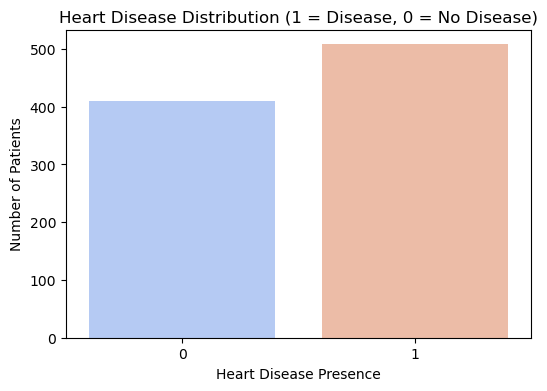

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='HeartDisease', data=df, hue='HeartDisease', palette='coolwarm', legend=False)
plt.title('Heart Disease Distribution (1 = Disease, 0 = No Disease)')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Number of Patients')
plt.show()

In [36]:
# Encode Categorical Columns
df_encoded = df.copy()
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
le = LabelEncoder()

In [38]:
# Encoding categorical columns 
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [39]:
# Define Features & Target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [40]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Split Data (Train-Test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [44]:
# Train Model (Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Model Evaluation
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
round(acc*100, 2) # In percentage

87.5

In [51]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



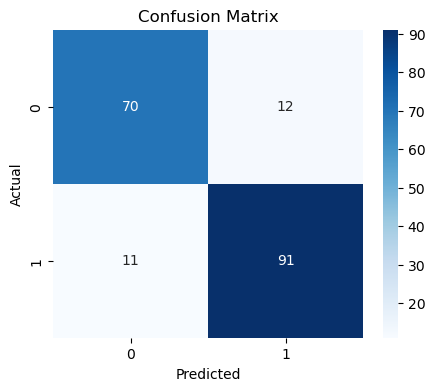

In [52]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
new_data = {
    'Age': 54,
    'Sex': 'Male',
    'ChestPainType': 'ATA',   # Options: TA, ATA, NAP, ASY
    'RestingBP': 130,
    'Cholesterol': 240,
    'FastingBS': 0,
    'RestingECG': 'Normal',   # Options: Normal, ST, LVH
    'MaxHR': 150,
    'ExerciseAngina': 'N',    # Options: Y or N
    'Oldpeak': 1.2,
    'ST_Slope': 'Up'          # Options: Up, Flat, Down
}

In [54]:
input_df = pd.DataFrame([new_data])

In [55]:
for col in categorical_cols:
    input_df[col] = le.fit_transform(input_df[col])

In [56]:
# Scale the input using the same scaler
input_scaled = scaler.transform(input_df)

In [60]:
# Make prediction
prediction = model.predict(input_scaled)
result = "Likely to have Heart Disease" if prediction[0] == 1 else "No Heart Disease Detected"

In [62]:
print("\n Patient Details:")
print(input_df)
print("\n Prediction Result:", result)


 Patient Details:
   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   54    0              0        130          240          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    150               0      1.2         0  

 Prediction Result: No Heart Disease Detected
